# segundo projeto de machine learning 
###  projeto de classificação


##### importando as bibliotecas padrões

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### importando o conjunto de dados MNIST

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1,parser = "auto")


In [ ]:
mnist.inde

#### separando os rotulos na variavel y e os atributos na variavel X

In [3]:
X,y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### aqui escolhi um numero aleatoria para visualisar sua imagem

In [7]:
some_digit = X.iloc[0]
some_digits = np.array(some_digit)
some_digits

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### mudei o shape da imagem para se adequar a função e ao formato da imagem

In [8]:
some_digit_image = some_digits.reshape(28,28)

#### plotei a imagem

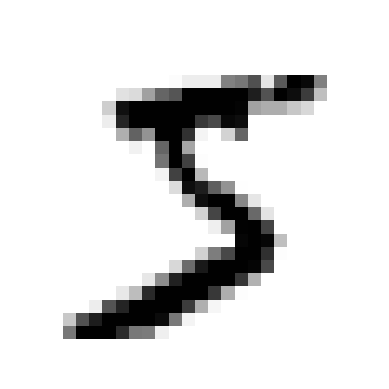

In [9]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

#### mostrando o label da imagem e confirmando que é um 5

In [10]:
y[0]

'5'

In [11]:
y = y.astype(np.uint8)

In [12]:
y[0]

5

#### separando em conjunto de teste e treino

In [13]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:], y[:60000],y[60000:]

In [14]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# vamos fazer um classificador binario que classifica se a imagem é ou não um numero 5

01. para isso criamos um array de labels onde os valores 5 estão sendo True e o contrario esta sendo False, como mostrado no proximo tópico

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

# vamos fazer a classificação

01. usamos primeiramente a SGDClassifier para fazer a classificação da imagem
02. testamos com a imagem criada anteriormente e funcionou

In [17]:
from sklearn.linear_model import SGDClassifier

y_train_5 = np.array(y_train_5)
x_train = np.array(x_train)
sgd = SGDClassifier(random_state=42)

sgd.fit(x_train,y_train_5)

sgd.predict([some_digits])

array([ True])

# medidas de desempenho

01. calcular uma medida de desempenho de um classificador é uma tarefa mais dificil
02. vamos primeiro testar a acuracia
03. vamos criar uma validaçao cruzada propria para fazermos as mudanças que quisermos nela, para isso utilizamos a função StratifiedKFold para fazer a separação dos dados


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(random_state= 42, n_splits = 3,shuffle=True)
clone = clone(sgd)
for train_index,test_index in skfolds.split(x_train,y_train_5):
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone.fit(x_train_folds,y_train_folds)
    y_pred = clone.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))
    

0.9669
0.91625
0.96785


In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd,x_train,y_train_5,cv= 5,scoring= "accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

# matriz de cofusão

01. a acuracia não se mostra tao eficaz para ser utilizada como medida de desempenho
02. podemos utilizar o que chamamos de matriz de cofusão que retorna os falsos positivos, falsos negativos, verdadeiros positivos, verdadeiros negativos
03. para isso usamos primeiramente a função cross_val_predict para pegar as previsões da validação
04. após isso usamos a função cofusion_matrix e nela colocamos o conjunto de treinamento e as previsões da validação

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd,x_train,y_train_5,cv = 3)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

# precisisão e revocação

01. outras medidas de desempenho são a precisão e revocação
02. precisão esta relacionada aos falsos positivos
03. a revocação está relacionada com os falsos negativos
04. se um aumenta o outro diminui


#### calculando a precisão usa a função precision_score 

In [22]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

#### calculando a revocação usa a função recall_score

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

# F1-SCORE
01. calculado juntando a precisão com a revocação
02. nem sempre vai ser bom usar o F1-SCORE se você quiser focar em falsos negativos ou falsos positivos a precisão ou revocação seria de bom uso

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

# funcionamento do SGDCLassifier
01. esse classificador calcula um score
02. se o score for maior que o limar da função ele manda a resposta positiva
03. se não for ele manda a resposta negativa
04. para ver o score é so utilizar a função decision_function
05. no caso abaixo pegamos o digito que separamos, que no caso a saida esperada seria um True
06. nesse caso o score foi maior que o limiar e a saída foi positiva, como esparado

In [25]:
y_score = sgd.decision_function([some_digit])

# entendendo o limiar

01. o skicit não deixa mudarmos o limiar da função mas da pra colocarmos da seguinte maneira pra fazer alguns testes 
02. nese caso usamos a variavel criada acima(y_score) com o score da imagem e criamos uma variavel determinando o limiar(treshold) e comparamos uma com a outra, depositando o valor na variavel y_some_digit_pred, ou seja se o score fosse maior que o limiar vai retornar uma resposta positiva

In [26]:
treshold = 0

y_score
y_some_digit_pred = (y_score > treshold)


treshold2 = 8000
y_some_digit_pred2 = (y_score > treshold2)
print(y_some_digit_pred)
print(y_some_digit_pred2)

[ True]
[False]


# calculando o melhor limiar
01. usamos primeiramente a função cross_val_predict e colocamos nela o metodo "decision_function" para ele aprensentar os scores na validação
02. com isso usamos a função precision_recall_curve para pegar a precisão, a revocação e o limiar a partir de dois parametros, os dados de treino e seus respectivos scores
03. depois vamos plotar a relação precisão e revocação como mostrado

In [27]:
y_scores = cross_val_predict(sgd,x_train,y_train_5,cv=3,method="decision_function")

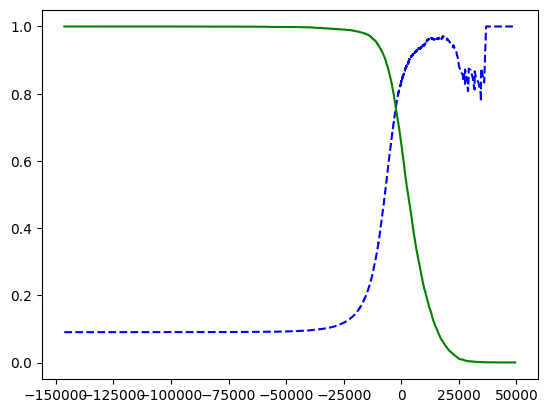

In [28]:
from sklearn.metrics import precision_recall_curve

precisions,recall,treshold = precision_recall_curve(y_train_5,y_scores)
precisions
def plot_precision_recall_vs_treshold(precisions,recalls,treshold):
    plt.plot(treshold,precisions[:-1],"b--",label = "Precision")
    plt.plot(treshold,recall[:-1],"g-",label = "Recall")
plot_precision_recall_vs_treshold(precisions = precisions,recalls = recall,treshold = treshold)
plt.show()

# determinando um valor de precisão
01. usamos a função argmax da biblioteca numpy para encontrar um valor de limiar para a precisão ser maior ou igual a algum valor, nesse caso o valor de 90%

In [29]:
treshold_90 = treshold[np.argmax(precisions >= 0.90)]

In [30]:
treshold_90

3370.0194991439557

#### pegando o valor de score onde o score é maior ou igual ao limiar

In [31]:
y_train_pred_90 = (y_scores >= treshold_90)

#### calculando o valor da precisão

In [32]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

# curva ROC
01. compara o FPR(False positive rate) e o TPR(True positive rate)
02. usada apenas para classificadores binários
03. a função recebe como parametros o array com True e False do que queremos classificar e como segundo parametro os respectivos scores calculados com a função cross_val_predict


In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5,y_scores)

#### plotando a roc_curve

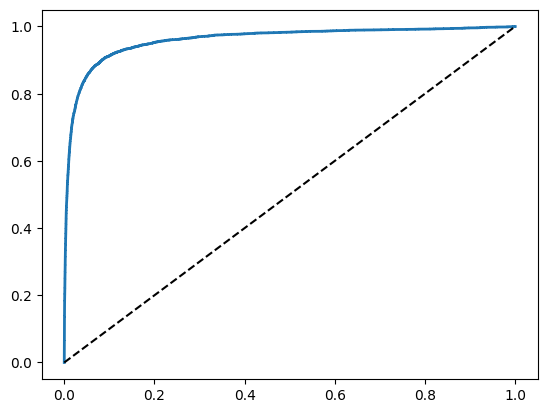

In [34]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1], "k--")
plot_roc_curve(fpr,tpr)
plt.show()

# AUC score
01. área sobre a curva
02. boa forma de comparar os classificadores
03. calculada a partir da função roc_auc_score
04. recebe como primeiro parametro o array com os valores de True e False para o que queremos classificar e de segundo parametro os seus respectivos scores


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

# utilizando um melhor classificador binario
01. utilizamos agora o RandomForestClassifier 
02. ele não possui o metodo decision_function como o SGDClassifier
03. ele possui um metodod chamado predict_proba
04. vamos calcular a AUC dele e depois vamos ver a precisão e a revocação

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state = 42)

#### aqui usamos o cross_val_predict(com o method = "predict_proba") para pegar as probabilidades que vinheram da função predict_proba da RandomForestClassifier

In [37]:
y_prob = cross_val_predict(forest_classifier,x_train,y_train_5,cv = 3, method = "predict_proba")

In [38]:
y_prob


array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

### pegamos apenas um dos 3 grupos de validação

In [39]:
y_scores2 = y_prob[:,1]

In [40]:
y_scores2

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

#### usamos a função roc_curve com o y_train_5 e o y_scores2 criado acima e pegamos dela o false positive rate(fpr_forest), o true positive rate(tpr_forest) e o limiar(treshold)

In [41]:
fpr_forest, tpr_forest,treshold = roc_curve(y_train_5,y_scores2)

#### pode ser criado um grafico para ver o melhor limiar pela curva ROC

#### treinamos o modelo com os dados de treino

In [42]:
forest_classifier.fit(x_train,y_train_5)

RandomForestClassifier(random_state=42)

In [43]:
x_test = np.array(x_test)

#### fizemos  a previsão com os dados de teste para calcularmos a precisão e a revocação que encontramos aproximadamente 99% e 86% aproximadamente

In [44]:
y_test_pred = forest_classifier.predict(x_test)

In [45]:
precision_score(y_test_5,y_test_pred)

0.993581514762516

In [46]:
recall_score(y_test_5,y_test_pred)

0.8677130044843049

#### além disso calculamos o f1 score e a AUC e obtivemos otimos resultados

In [47]:
f1_score(y_test_5,y_test_pred)

0.926391382405745

In [48]:
roc_auc_score(y_train_5,y_scores2)

0.9983436731328145

# Classificação multiclasse

### testando o maquinas de vetores de suporte(SVC)

In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC()

In [51]:
svm.fit(x_train,y_train)

SVC()

#### vemos que ele preveu o numero 5 corretamente

In [52]:
svm.predict([some_digit])

array([5], dtype=uint8)

#### percebe-se que o score do número 5 foi maior

In [53]:
svm.decision_function([some_digit])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

#### método .classes_ mostra as classes dos dados de treinamento(rótulos)

In [54]:
svm.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### testando a acuracia do modelo com a função cross_val_score

In [55]:
cross_val_score(sgd,x_train,y_train,cv= 3,scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

#### melhorando as previsões transformando os dados com o StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [62]:
cross_val_score(svm,x_train_scaled, y_train,cv = 2, scoring = "accuracy")

array([0.95653333, 0.9568    ])

# usando a matriz de cofusão para analisar os erros
01. primeiro prevemos valores com a cross_val_predict
02. depois criamos a matriz de cofusão
03. e mostramos graficamente com a função matshow do matplotilib.pyplot

In [63]:
y_train_pred = cross_val_predict(svm,x_train_scaled,y_train,cv = 2)

In [64]:
cof_mx = confusion_matrix(y_train,y_train_pred)

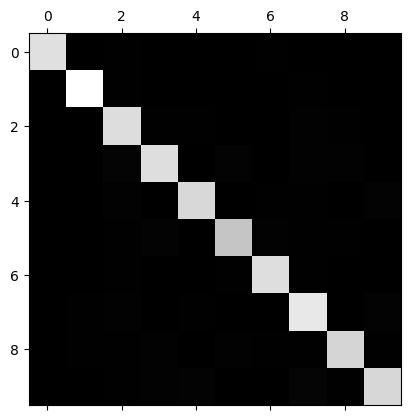

In [65]:
plt.matshow(cof_mx,cmap=plt.cm.gray)
plt.show()

In [68]:
row_sums = cof_mx.sum(axis=1, keepdims = True)
norm_conf_mx = cof_mx/row_sums

In [1]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

NameError: name 'np' is not defined

In [2]:
cl_a, cl_b = 3,5
x__aa = x_tr

NameError: name 'x_tra' is not defined